<a href="https://colab.research.google.com/github/Rocyan4/Data_science/blob/master/Titanic_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Análise de dados
import pandas as pd
import numpy as np



# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Classe de Regressão Linear
from sklearn.linear_model import LinearRegression

# Validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/My Drive/train.csv")
test = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))


Variáveis:	12
Entradas:	891


In [ ]:
# função identificação
def faixaetaria(age):
  if age < 18:
    return 'Criança'
  if age > 18:
    return 'Adulto'
  else:
    return 'Idoso'

In [ ]:
train['Faixa etaria'] = train['Age'].apply(faixaetaria)

In [ ]:
train[['Faixa etaria','Survived']].groupby(['Faixa etaria']).mean()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Faixa etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adulto
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adulto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Adulto
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adulto


In [ ]:
#train.isnull().sum()

In [ ]:
# %
#(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)


In [ ]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# Verificando a frequência dos valores de 'Embarked'
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Substituindo os valores nulos de 'Embarked' por 'S'
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'



In [ ]:
# Substituindo os valores nulos de 'Age' pela mediana da coluna
train.loc[train['Age'].isnull(), 'Age'] = train['Age'].median()



In [ ]:
# Verificando 'Age' com o método .describe(), agora sem dados nulos (NaN)
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

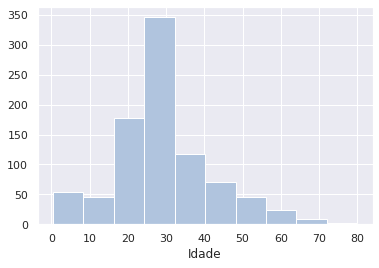

In [ ]:
# Histograma de idades
sns.set()
plt.hist(train['Age'], color='lightsteelblue')
plt.xlabel("Idade")
plt.show()

In [ ]:
cols = train.columns.values
cols

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Faixa etaria'],
      dtype=object)

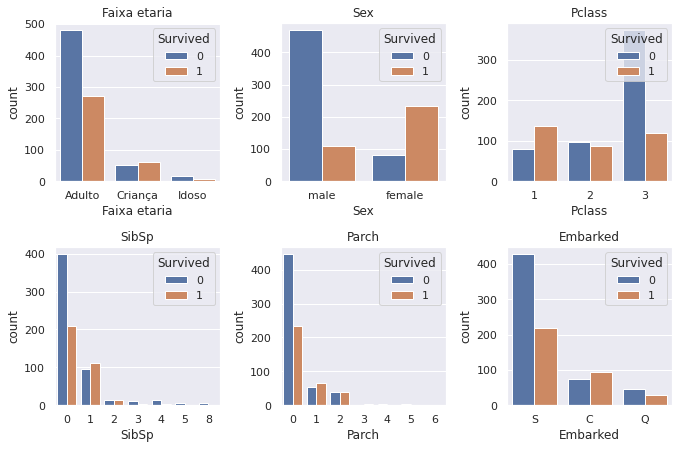

In [ ]:
colunas = ['Faixa etaria','Sex',"Pclass",'SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots (n_rows,n_cols,  figsize = (n_cols * 3.2,n_rows * 3.2))

for i in range(0,n_rows):
  for c in range(0,n_cols):

    plot = i*n_cols + c 

    ax = axs[i][c]
    sns.countplot(train[colunas[plot]], hue=train['Survived'], ax=ax)
    ax.set_title(colunas[plot])
    ax.legend( title='Survived', loc = 'upper right')

    plt.tight_layout()   

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()


,Survived
Sex,
female,0.742038
male,0.188908


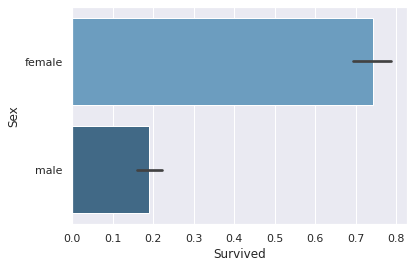

In [ ]:
train['Sex'].unique()
train[['Sex', "Survived"]].groupby(['Sex']).mean()
plot = sns.barplot(x='Survived', y='Sex', data=train, palette="Blues_d", order=['female','male'])

In [ ]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


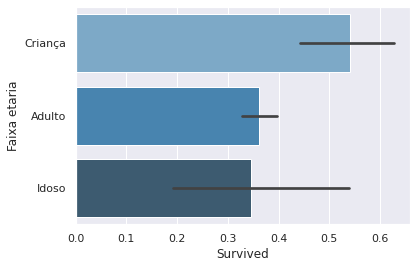

In [ ]:
plot = sns.barplot(x='Survived', y='Faixa etaria',  data = train, palette="Blues_d", order=['Criança','Adulto','Idoso'])


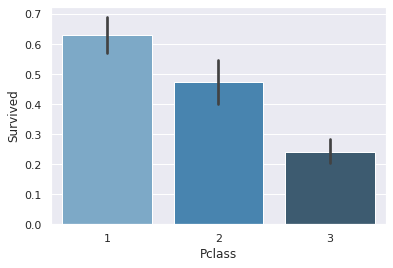

In [ ]:
plot = sns.barplot(x='Pclass', y='Survived',  data = train, palette="Blues_d", )
